# Предварительная настройка

In [ ]:
# !python -m pip install "dask[complete]"
# !pip install joblib
# !pip install sklearn

# !pip install seaborn
# !pip install seaborn[stats]

time: 354 µs (started: 2022-10-03 19:32:13 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 29.4 MB/s 
time: 453 µs (started: 2022-10-04 13:18:56 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# from dask.distributed import Client
# import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import os
import chardet
import gc
from collections import Counter 

print("Setup Complete")

Setup Complete
time: 10.9 ms (started: 2022-10-03 19:32:23 +00:00)


In [ ]:
# Функция для проверки категориальных данных датафрейма.
def show_unique_values(df, col_names):
  
  result = pd.DataFrame(index=col_names, columns = ['unique_values','unique_values_count'])

  for cur_col_name in col_names:
    result.loc[cur_col_name,['unique_values']] = str(sorted(df[cur_col_name].unique()))
    result.loc[cur_col_name,['unique_values_count']] = df[cur_col_name].nunique()

  return(result)

# Функция для проверки диапазона числовых значений датафрейма
def check_columns_boundaries(df, columns_names):
  """ """
  for name in columns_names:
    min = df[name].dropna().min()
    max = df[name].dropna().max()
    print("Column", name, "has values in the range:", min, " - ", max)

# Функция формирующая отчет по отсутсвующим значениям
def miss_val_summ_report(df):
  # Найдём общие показатели 

  # Кол-во и процент NULL
  df_total_cells = np.product(df.shape)
  df_total_is_null = df.isnull().sum().sum()
  df_total_is_null_proc = df_total_is_null * 100 / df_total_cells

  # Кол-во и процент NaN
  df_total_na = df.isna().sum().sum()
  df_total_is_na_proc = df_total_na * 100 / df_total_cells

  missing_values = pd.DataFrame(columns = ['Null_COUNT', 'Null_%', 'NaN_COUNT', 'NaN_%'])

  missing_values['Null_COUNT'] = df.isnull().sum()
  missing_values['Null_%'] = df['Null_COUNT'] * 100 / df.shape[0]
  missing_values['NaN_COUNT'] = df.isna().sum()
  missing_values['NaN_%'] = missing_values['NaN_COUNT'] * 100 / df.shape[0]

  print('Dataframe missing values summary:')
  print(missing_values)
  print('The total number of cells with NULL is ', df_total_is_null, ' which is ', df_total_is_na_proc, '% of the total number of cells.', sep="")
  print('The total number of cells with NaN is ', df_total_na, ' which is ', df_total_is_na_proc, '% of the total number of cells.', sep="")
  
  return None

time: 6.15 ms (started: 2022-10-03 19:32:29 +00:00)


Для загрузки данных в платформе Google Collab необходимо выполнить следующий код:

In [ ]:
# Подключим диск Google Drive
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/MIPT/Data_Scientist/Data_analysis_techniques_and_machine_learning_methods/Part_1/Homework_2/Data/archive.zip -d /content/

Mounted at /content/drive
Archive:  /content/drive/MyDrive/MIPT/Data_Scientist/Data_analysis_techniques_and_machine_learning_methods/Part_1/Homework_2/Data/archive.zip
  inflating: /content/creditcard.csv  
time: 26.4 s (started: 2022-10-04 13:18:56 +00:00)


# Problem Definition (Описание проблемы)

Датасет содержит транзакции по кредитным картам (284 807 транзакции из которых 492 мошенничества). В наборе данных параметры преобразованы с помощью метода PCA (все параметры уже числовые). Необходимо создать модель определяющую мошенничества в условиях сильной несбалансированности классов.

# Data Extraction (Извлечение данных)

In [ ]:
col_dtypes = {
    'Time' : 'int32',
    'V1' : 'float32',
    'V2' : 'float32',
    'V3' : 'float32',
    'V4' : 'float32',
    'V5' : 'float32',
    'V6' : 'float32',
    'V7' : 'float32',
    'V8' : 'float32',
    'V9' : 'float32',
    'V10' : 'float32',
    'V11' : 'float32',
    'V12' : 'float32',
    'V13' : 'float32',
    'V14' : 'float32',
    'V15' : 'float32',
    'V16' : 'float32',
    'V17' : 'float32',
    'V18' : 'float32',
    'V19' : 'float32',
    'V20' : 'float32',
    'V21' : 'float32',
    'V22' : 'float32',
    'V23' : 'float32',
    'V24' : 'float32',
    'V25' : 'float32',
    'V26' : 'float32',
    'V27' : 'float32',
    'V28' : 'float32',
    'Amount' : 'float32',
    'Class' : 'int16'
}

time: 7.19 ms (started: 2022-10-03 19:32:49 +00:00)


In [ ]:
df = pd.read_csv("creditcard.csv", sep=",", decimal='.', dtype = col_dtypes)

df.dtypes

Time        int32
V1        float32
V2        float32
V3        float32
V4        float32
V5        float32
V6        float32
V7        float32
V8        float32
V9        float32
V10       float32
V11       float32
V12       float32
V13       float32
V14       float32
V15       float32
V16       float32
V17       float32
V18       float32
V19       float32
V20       float32
V21       float32
V22       float32
V23       float32
V24       float32
V25       float32
V26       float32
V27       float32
V28       float32
Amount    float32
Class       int16
dtype: object

time: 2.4 s (started: 2022-10-03 19:32:51 +00:00)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0


time: 27.3 ms (started: 2022-10-03 19:33:03 +00:00)


# Data cleaning (Отчистка данных)

### Категориальные данные

In [ ]:
category_columns = ['Class']

show_unique_values(df, category_columns)

,unique_values,unique_values_count
Class,"[0, 1]",2


time: 24.1 ms (started: 2022-10-03 19:33:06 +00:00)


#### Приведение к корректному типу данных

In [ ]:
df[category_columns] = df[category_columns].astype('category')

df.dtypes

Time         int32
V1         float32
V2         float32
V3         float32
V4         float32
V5         float32
V6         float32
V7         float32
V8         float32
V9         float32
V10        float32
V11        float32
V12        float32
V13        float32
V14        float32
V15        float32
V16        float32
V17        float32
V18        float32
V19        float32
V20        float32
V21        float32
V22        float32
V23        float32
V24        float32
V25        float32
V26        float32
V27        float32
V28        float32
Amount     float32
Class     category
dtype: object

time: 15.5 ms (started: 2022-10-03 19:33:09 +00:00)


### Временные интервалы

#### Приведение к корректному типу данных

In [ ]:
# df['Time'] = pd.to_timedelta(df['Time'], unit='S', errors='raise')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0


time: 29.5 ms (started: 2022-10-03 19:33:11 +00:00)


## Handling Missing Values (Обработка отсуствующих значений). 

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

time: 24.1 ms (started: 2022-10-03 19:33:14 +00:00)


## Data deduplication (Дедубликация данных)

In [ ]:
(df.duplicated(keep=False)).sum()

1854

time: 851 ms (started: 2022-10-03 19:33:17 +00:00)


In [ ]:
df[df.duplicated(keep=False) == True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.140000,0
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.140000,0
34,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.770000,0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.770000,0
112,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.180000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.930000,0
284190,172233,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.660000,0
284191,172233,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.660000,0
284192,172233,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.740002,0


time: 905 ms (started: 2022-10-03 19:33:20 +00:00)


In [ ]:
df = df.drop_duplicates()

df.shape

(283726, 31)

time: 869 ms (started: 2022-10-03 19:33:25 +00:00)


# Primary data analysis (Первичный анализ данных)

Объём данных достаточно большой, чтобы вызвать проблемы при построении графиков (более 5000 точек данных). При построении графиков на таком обьеме данных могут возникнуть проблемы (нехватка RAM, высокая вычислительная емкость операции построения графика, низкое качество графика в виду большого количества точек). Чтобы минимизировать обьем данных возьмём репрезентативную (стратифицированную) выборку из общего датасета. 

## Stratified sample (Стратифицированная выборка)

Сделаем стратифицированную выборку:

In [ ]:
# Разделим цель прогноза и параметры
y = df['Class']
X = df.drop('Class', axis=1)

# Сделаем стратифицированную выборку размером 25% от генеральной совокупности
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.01)

stratified_sample = pd.merge(X_test, y_test, left_index=True, right_index=True)

# Экономим память, эти данные более не нужны
del X,y,X_train,X_test,y_train,y_test
gc.collect()

stratified_sample.Class.value_counts()

0    2833
1       5
Name: Class, dtype: int64

time: 283 ms (started: 2022-10-03 19:33:30 +00:00)


## Selection of features for plotting with the principal component method (Выбор параметров для построения графиков с помощью метода главных компонент)

В нашем датасете изначально 30 параметров. Для такого большого количества параметров построить графики будет проблематично. Используем метод PCA для отбора наиболее важных параметров:

In [ ]:
from sklearn.decomposition import PCA

feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

sklearn_pca = PCA()
sklearn_pca.fit(stratified_sample[feature_names])

variance_ratio = sklearn_pca.explained_variance_ratio_
variance_ratio = pd.DataFrame(variance_ratio, index = feature_names, columns=['variance_ratio'])

# Отсортируем результат по убыванию (наиболее информативные признаки в начале столбца).
variance_ratio.sort_values(by=['variance_ratio'], ascending=False, inplace=True)

variance_ratio

,variance_ratio
Time,9.999715e-01
V1,2.850149e-05
V2,1.717758e-09
V3,1.220388e-09
V4,9.931637e-10
V5,8.252613e-10
V6,8.146867e-10
V7,7.046310e-10
V8,5.851479e-10
V9,5.236137e-10


time: 72.8 ms (started: 2022-10-03 19:33:34 +00:00)


Теперь мы можем судить о вкладе каждого параметра в результат предсказания по его изменчивости данных. Кроме того, после создания стратифицированной выборки и выбора наиболее значимых признаком мы можем построить графики более избирательно.

## Pairplot plot matrix (Матрица парных графиков)

Построим матрицу парных графиков для первых 8 наиболее значимых компонент: 

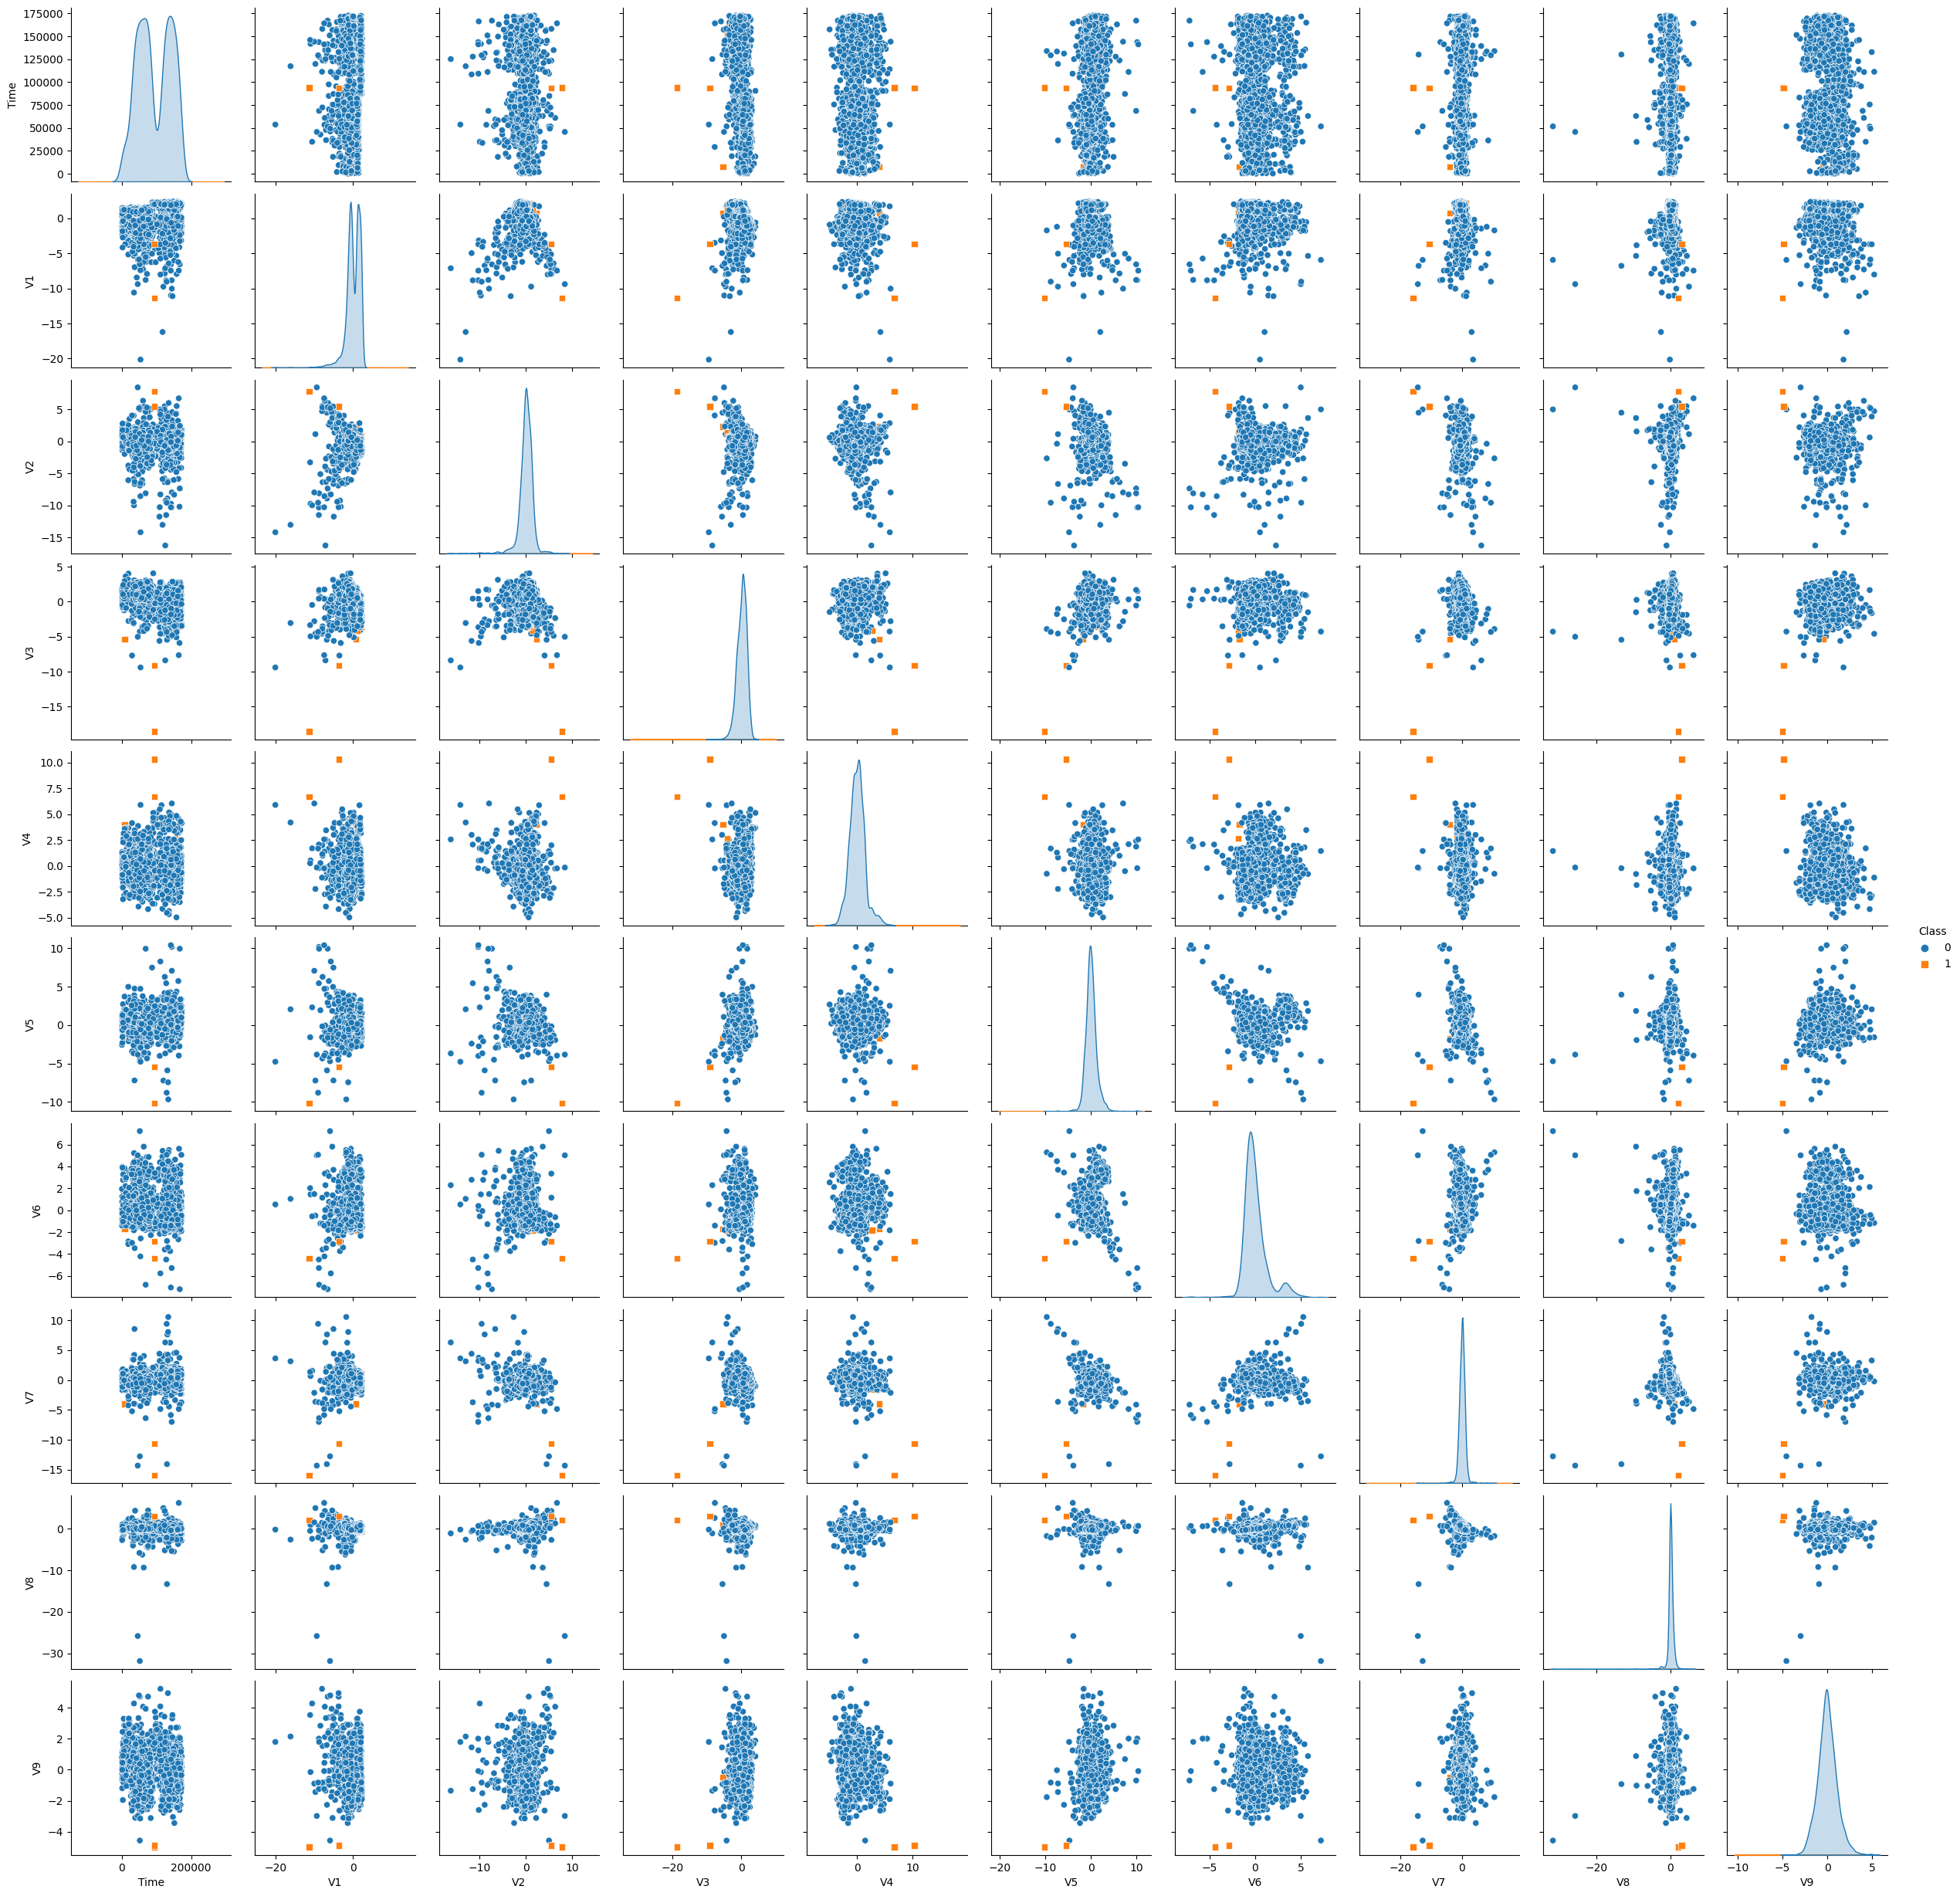

time: 1min (started: 2022-10-03 16:52:23 +03:00)


In [ ]:
sns.pairplot(
    stratified_sample,
    x_vars=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'],
    y_vars=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'],hue="Class", markers=["o", "s"]
)
plt.savefig('pairplot.png')
plt.show()

Cудя по доле миноритарного класса и диаграммам рассеивания графически подобрать наиболее эффективный метод балансировни классов будет потенциально проблематично из за большого количества параметров. Перейдём к аналитическим методам. Будем перебирать различные методы в поисках наиболее эффективного.

## Check the balance of classes (Проверим баланс классов)

Проверим баланс классов в данных с помощью гистограммы:

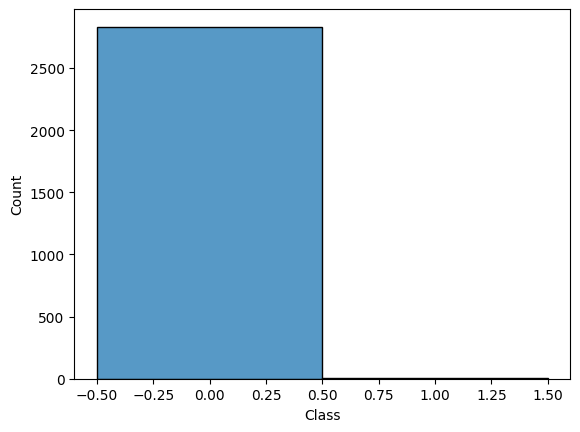

time: 156 ms (started: 2022-10-03 15:31:06 +03:00)


In [ ]:
sns.histplot(stratified_sample['Class'], bins=2, stat="count", discrete=True)
plt.show()

На гистограмме хоршо видна проблема с дизбалансом классов. Это серьезная проблема для задачи классификации.

# Baseline (базовая модель)

## Selecting a metric to validate the classification model (Выбор метрики для валидации модели классификации)

Так как нам необходимо произвести классификацию экземпляров, выберем для валидации метрику f1_score. Дополнительно будем оценивать модель с помощью отчета классификации из модуля sklearn.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

time: 805 µs (started: 2022-10-03 19:33:47 +00:00)


## Selecting data for modeling (Выбор данных для моделирования)

### Selecting a prediction target (Выбор цели прогноза)

In [ ]:
y = df['Class']
y.shape

(283726,)

time: 13.9 ms (started: 2022-10-03 19:33:50 +00:00)


### Select model features (Выбор параметров модели)

In [ ]:
X = df.drop('Class', axis=1)
X.shape

(283726, 30)

time: 14.9 ms (started: 2022-10-03 19:33:51 +00:00)


## Dividing the dataset into training and test samples (Разделение датасета на тренировочную и тестовую выборки)

Для проведения валидации модели необходимо, чтобы модель не тренировалась на данных используемых для ее оценки. Разделим данные на тренировочную и тестовую выборки в соотношении 70% тренировачных даных, 30% тестовых данных: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
259021,158923,1.751110,-1.217634,-1.248006,-0.375733,-1.027579,-1.036205,-0.543211,-0.286739,-0.113454,...,0.502681,0.373010,0.765897,-0.083451,-0.013653,-0.190530,-0.115267,-0.002145,0.025886,219.000000
132204,79896,-1.853782,0.924218,1.864239,-0.876365,-1.404122,-0.102966,-0.400768,0.992048,-0.041152,...,-0.320469,-0.014002,-0.196689,-0.075884,0.616682,0.141713,0.808112,-0.488831,-0.135641,46.910000
21564,31739,1.212969,0.324455,0.283137,0.641189,-0.161641,-0.596654,0.027025,-0.080178,-0.010984,...,-0.095296,-0.256852,-0.694153,0.155535,0.041118,0.152094,0.123219,-0.004910,0.028008,1.980000
75819,56269,0.087050,-1.547541,-0.839388,1.600529,-0.058722,0.331889,1.110655,-0.275008,-0.157169,...,1.142558,0.318999,-0.192974,-0.770419,-0.684518,0.699158,-0.247745,-0.081381,0.109981,608.849976
13910,24680,1.294020,0.364968,-0.081084,0.481095,0.394243,0.046433,-0.121200,-0.060940,1.132666,...,-0.050600,-0.466401,-1.139435,-0.039215,-1.066696,0.336449,0.117806,-0.056115,0.002507,8.990000


time: 172 ms (started: 2022-10-03 19:33:54 +00:00)


## Scaling numerical parameters (Масштабирование числовых параметров)

In [ ]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,...,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000
mean,94668.452238,0.004875,-0.003402,0.003520,-0.000220,0.003215,-0.000483,0.000663,-0.001736,-0.000547,...,0.001275,0.000694,-0.000317,0.000771,-0.000008,0.000934,-0.000771,0.001855,0.000398,88.502625
std,47527.521372,1.945138,1.648556,1.509085,1.415075,1.385485,1.335229,1.243064,1.193181,1.098131,...,0.775069,0.733875,0.726219,0.622181,0.606931,0.520323,0.482164,0.400561,0.324182,252.982117
min,0.000000,-56.407509,-72.715729,-48.325588,-5.683171,-113.743309,-26.160505,-43.557243,-73.216721,-13.434067,...,-54.497719,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430084,0.000000
25%,54040.750000,-0.917012,-0.600636,-0.889168,-0.848608,-0.690128,-0.768689,-0.553225,-0.208485,-0.645852,...,-0.211072,-0.227982,-0.541795,-0.161857,-0.355277,-0.316905,-0.327909,-0.070825,-0.052970,5.610000
50%,84586.500000,0.019080,0.064518,0.182785,-0.020748,-0.053048,-0.274900,0.040487,0.021238,-0.051472,...,-0.061838,-0.029061,0.005929,-0.011631,0.040906,0.017045,-0.053955,0.001389,0.011169,22.045000
75%,139212.250000,1.314964,0.799086,1.028280,0.744865,0.614056,0.399697,0.570549,0.325902,0.597759,...,0.133917,0.186579,0.527749,0.147073,0.440688,0.351794,0.239005,0.091030,0.078219,77.300003
max,172792.000000,2.454930,22.057730,9.382559,16.875343,34.801666,73.301628,120.589493,20.007208,15.594995,...,39.420906,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847809,25691.160156


time: 219 ms (started: 2022-10-03 17:09:59 +03:00)


Судя по величине стандартного отклонения `std` в датасете есть параметры (`Time`,`Amount`) изменяющиеся в очень большом диапазоне и/или отличаться друг от друга на несколько порядков.

Для обеспечения оптимальной эффективности алгоритмов машинного обучения необходимо произвести масштабирование параметров. Масштабирование параметров выполняется для вещественных и целочисленных (не категориальных) параметров. Это критически важный шаг в конвейере предварительной обработки данных, так как позволяет снизить вычислительную емкость модели машинного обучения и повысить ее эффективность. 

Два наиболее часто используемых метода масштабирования - нормализация и стандартизация.

Нормализация - изменение масштаба признака на диапазон от О до 1, которое
представляет собой частный случай масштабирования по минимаксу (min-max scaling)

Cтандартизация - изменение набора даныых которое придает нашим данным характеристики стандартного нормального распределения: нулевое среднее и единичную дисперсию.  Стандартизация сохраняет полезную инормацию о выбросах и делает алгоритм менее чувствительным к ним. Стандартизация более практична для многих алгоритмов MO, особенно для алгоритмов наподобие градиетного спуска.

Так как мы планируем использовать разные модели машинного обучения (в том числе с rрадиентным спуском), произведем стандартизацию нашего набора данных:

In [ ]:
# Создадим копию тренировочных и тестовых наборов
X_train_std = X_train
X_test_std = X_test

сol_for_norm = ['Time','Amount']

cur_scaler = StandardScaler()

# Стандартизируем тренировачный набор данных
X_train_std[сol_for_norm] = cur_scaler.fit_transform(X_train[сol_for_norm])

# Пирименим стандартизацию с теми же параметрами на тестовы набор.
X_test_std[сol_for_norm] = cur_scaler.transform(X_test[сol_for_norm])

# Получим имена столбцов
X_train_column_names = X_train.columns
X_test_column_names = X_test.columns

# Вернём имена столбцов нормализованным данным
X_train_std = pd.DataFrame(X_train_std, columns=X_train_column_names)
X_test_std = pd.DataFrame(X_test_std, columns=X_test_column_names)

# Проверим как прошла стандартизация тренировочного и тестового наборов
X_train_std.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.986080e+05,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,...,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,1.986080e+05
mean,2.468554e-17,0.004875,-0.003402,0.003520,-0.000220,0.003215,-0.000483,0.000663,-0.001736,-0.000547,...,0.001275,0.000694,-0.000317,0.000771,-0.000008,0.000934,-0.000771,0.001855,0.000398,-7.198159e-17
std,1.000003e+00,1.945138,1.648556,1.509085,1.415075,1.385485,1.335229,1.243064,1.193181,1.098131,...,0.775069,0.733875,0.726219,0.622181,0.606931,0.520323,0.482164,0.400561,0.324182,1.000003e+00
min,-1.991871e+00,-56.407509,-72.715729,-48.325588,-5.683171,-113.743309,-26.160505,-43.557243,-73.216721,-13.434067,...,-54.497719,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430084,-3.498384e-01
25%,-8.548269e-01,-0.917012,-0.600636,-0.889168,-0.848608,-0.690128,-0.768689,-0.553225,-0.208485,-0.645852,...,-0.211072,-0.227982,-0.541795,-0.161857,-0.355277,-0.316905,-0.327909,-0.070825,-0.052970,-3.276629e-01
50%,-2.121293e-01,0.019080,0.064518,0.182785,-0.020748,-0.053048,-0.274900,0.040487,0.021238,-0.051472,...,-0.061838,-0.029061,0.005929,-0.011631,0.040906,0.017045,-0.053955,0.001389,0.011169,-2.626976e-01
75%,9.372235e-01,1.314964,0.799086,1.028280,0.744865,0.614056,0.399697,0.570549,0.325902,0.597759,...,0.133917,0.186579,0.527749,0.147073,0.440688,0.351794,0.239005,0.091030,0.078219,-4.428242e-02
max,1.643758e+00,2.454930,22.057730,9.382559,16.875343,34.801666,73.301628,120.589493,20.007208,15.594995,...,39.420906,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847809,1.012037e+02


time: 235 ms (started: 2022-10-03 17:10:00 +03:00)


## Optimization of hyperparameters (Оптимизация гиперпараметров)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = {'C': [ 0.01, 0.1, 1, 10, 100],
                'penalty': ['l2'],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg = LogisticRegression()

gs = GridSearchCV(log_reg, log_reg_grid, cv=5, n_jobs=-1, scoring='f1', verbose=1)
gs.fit(X_train_std, y_train)

# Сохраним оптимальные параметры базовой модели для дальнейшего использования
baseline_model_best_param = gs.best_params_

val_model = LogisticRegression(**gs.best_params_)
val_model.fit(X_train_std, y_train)

prediction = val_model.predict(X_test_std)
score = f1_score(y_test, prediction)
print('Best GridSearch F1_score:', gs.best_score_, 'with params:', gs.best_params_)
print('F1 on test:', score, '\n')

print(classification_report(y_test, prediction))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best GridSearch F1_score: 0.7125440336951396 with params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
F1 on test: 0.689655172413793 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.89      0.56      0.69       142

    accuracy                           1.00     85118
   macro avg       0.94      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118

time: 1min 30s (started: 2022-10-03 17:10:04 +03:00)


## Results (Результаты)

Несмотря на высокий f1-score = 1 для 0 класса (образцов которого больше всего), из отчёта по  классификации очень хорошо видно, что результаты классификации класса `1` очень низкие (recall =  0.56, f1-score = 0.69). Причина этого, кроется в несбалансированности классов. 

# Feature Engineering (Инженерия параметров)

Определим специальную функцию для замера результатов применяемых к датасету методов семплинга:

In [ ]:
# Функция для сравнения различных подходов на этапе инженерии параметров
def score_dataset(X_train, y_train, X_test, y_test, model_best_param):

    # # Эксперимент, заново подберем гиперпараметры.
    # log_reg_grid = {'C': [ 0.01, 0.1, 1, 10, 100],
    #             'penalty': ['l2'],
    #             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

    # log_reg = LogisticRegression()

    # gs = GridSearchCV(log_reg, log_reg_grid, cv=5, n_jobs=-1, scoring='f1', verbose=2)
    # gs.fit(X_train, y_train)

    # model_best_param = gs.best_params_

    # print("NEW BEST HYPERPARAMS:", model_best_param)

    # # Конец

    # Подгоним модель на новых данных
    model = LogisticRegression(**model_best_param)
    model.fit(X_train, y_train)
    
    # Сделаем предсказание и определим метрики для новой модели
    preds = model.predict(X_test)

    score = f1_score(y_test, preds)
    print(classification_report(y_test, preds),'\n')
    print('F1 on test:', score, '\n')
    print("Best hyperparameters:", model_best_param)

    return score

time: 0 ns (started: 2022-10-03 17:16:02 +03:00)


Получим количество элементов каждого класса в исходных данных, чтобы отслеживать изменения в зависимости от применяемого метода балансировки классов:

In [ ]:
count_class_0, count_class_1 = df.Class.value_counts()
print("Количество экзепляров класса 0:", count_class_0,"Количество экзепляров класса 1:", count_class_1)

Количество экзепляров класса 0: 283253 Количество экзепляров класса 1: 473
time: 15 ms (started: 2022-10-03 17:23:18 +03:00)


## Imbalanced data (Несбалансированные данных)

Основной проблемой данного датасета является несбалансированность данных. Данная проблема в машинном обучении решается следущими способами:
- Сокращение числа примеров мажоритарного класса:
  - Наивный случайный under-sampling (Naive random under-sampling)
  - Поиск связей Томека (Tomek Links)
  - Правило ближайшего соcредоточенного соседа (Condensed Nearest Neighbor Rule)
  - Односторонний сэмплинг (One-side sampling, one-sided selection — OSS)
  - Правило «очищающего» соседа (neighborhood cleaning rule — NCR)
- Увеличение числа примеров миноритарного класса:
  - Наивный случайный over-sampling (Naive random over-sampling)
  - Алгоритм SMOTE
  - Алгоритм ADASYN



Полный набор современных методов семплинга данных с помощью модуля **imbalance-learn contrib** для sklearn. Этот подмодуль устанавливается по умолчанию как часть базовой установки sklearn, поэтому он должен быть доступен каждому. Он также поставляется с собственной документацией, которая доступна здесь.

Библиотека `imblearn` реализует over-sampling и under-sampling с помощью специальных классов.

### Algorithmic methods (Алгоритмические методы)

#### Reducing the Number of Majority Class Examples (Сокращение числа примеров мажоритарного класса)

##### Наивный случайный under-sampling (Naive random under-sampling)

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

Это самая простая и примитивная стратегия, но понятная и несложная в реализации. Сначала определяется число $K$ примеров доминирующего класса, которое требуется удалить, чтобы достичь требуемого соотношения классов в обучающей выборке. Затем случайным образом выбираются $K$ наблюдений доминирующего класса и удаляются.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Произведем over-sampling тренировочных данных по мажоритарному классу
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_traint_std_rus, y_train_rus = rus.fit_resample(X_train_std, y_train)
print("Complete!")

Complete!
time: 47 ms (started: 2022-10-03 19:24:55 +03:00)


Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_rus))

Баланс классов в новом тренировочном наборе: Counter({0: 331, 1: 331})
time: 0 ns (started: 2022-10-03 19:24:56 +03:00)


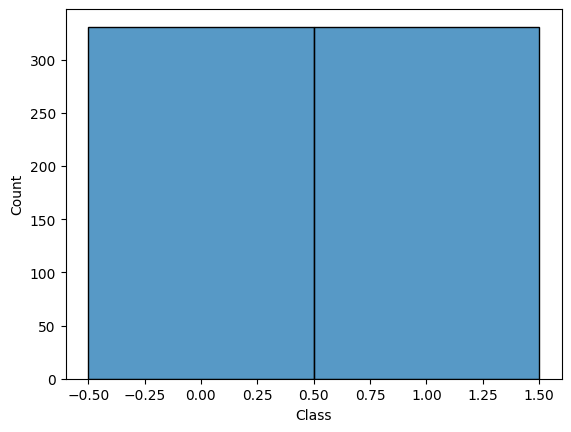

time: 140 ms (started: 2022-10-03 19:24:58 +03:00)


In [ ]:
sns.histplot(y_train_rus)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_rus, y_train_rus, X_test_std, y_test, baseline_model_best_param)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.05      0.89      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118
 

F1 on test: 0.08948863636363637 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


0.08948863636363637

time: 110 ms (started: 2022-10-03 19:25:01 +03:00)


##### Поиск связей Томека (Tomek Links)

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html#

Cвязи Томека объединяют близко расположенные наблюдения различных классов. Большое количество связанных таким образом наблюдений вызывает эффект наложения классов в пространстве признаков, как показано на рисунке ниже.

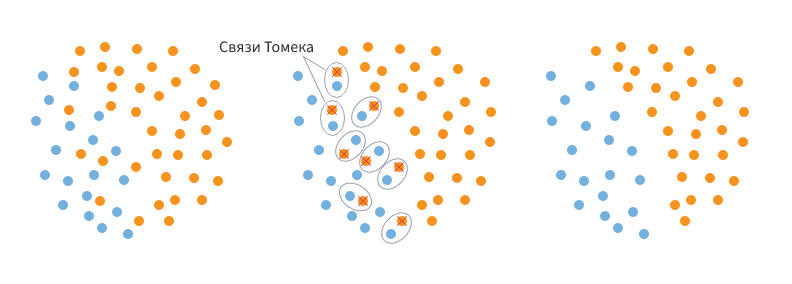

Удаление наблюдений, входящих в связи Томека и относящихся к доминирующему классу, не только выравнивает баланс данных, но и делает границы классов более чёткими и выраженными, что повышает качество классификации.

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority', n_jobs = -1)
X_traint_std_tl, y_train_tl = tl.fit_resample(X_train_std, y_train)

# Вернём имена столбцов обучающим данным.
X_traint_std_tl = pd.DataFrame(X_traint_std_tl, columns=X_train_std.columns)

print("Complete!")

Complete!
time: 21.6 s (started: 2022-10-03 19:25:17 +03:00)


Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_tl))

Баланс классов в новом тренировочном наборе: Counter({0: 198259, 1: 331})
time: 16 ms (started: 2022-10-03 19:25:42 +03:00)


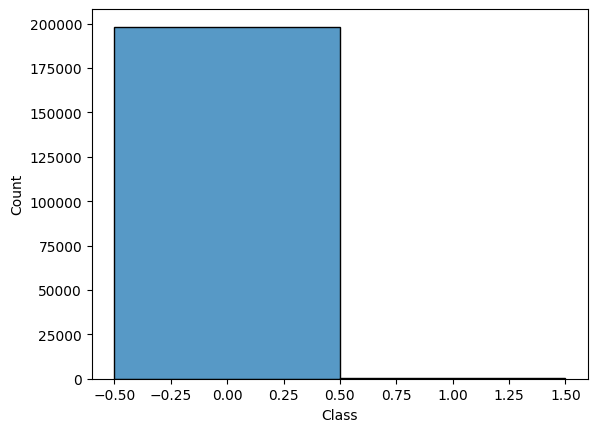

time: 265 ms (started: 2022-10-03 19:23:36 +03:00)


In [ ]:
sns.histplot(y_train_tl, bins=3)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_tl, y_train_tl, X_test_std, y_test, baseline_model_best_param)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.89      0.56      0.69       142

    accuracy                           1.00     85118
   macro avg       0.94      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118
 

F1 on test: 0.689655172413793 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


0.689655172413793

time: 1.78 s (started: 2022-10-03 19:23:37 +03:00)


##### Правило ближайшего соcредоточенного соседа (Condensed Nearest Neighbor Rule)

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html

набора данных $L$ извлекаются все примеры миноритарного класса и один мажоритарного (обозначим полученное подмножество как $S$). Затем производится классификация всех примеров из $L$ по методу одного ближайшего соседа ($1-N$), когда каждому, случайно выбранному наблюдению присваивается метка класса ближайшего соседа. При этом, если для наблюдения допущена ошибка классификации (найденный и фактический классы не совпадают), то оно добавляется в $S$.

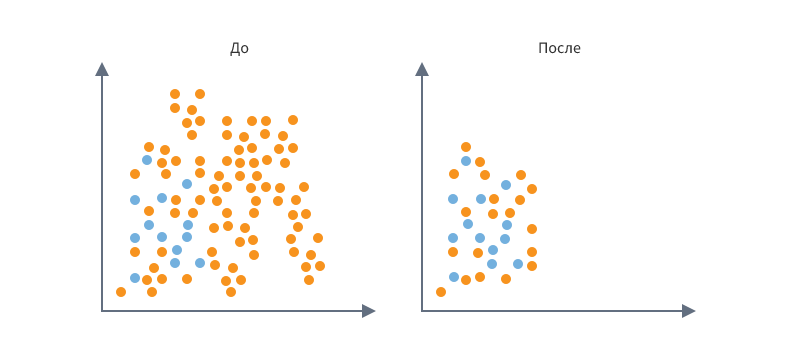

Таким образом, из множества $L$ в множество $S$ будут перемещены все наблюдения мажоритарного класса, для которых ближайшим соседом будет наблюдение другого класса. Процесс будет идти до тех пор, пока в исходном наборе не закончатся наблюдения доминирующего класса, близкие к наблюдениям другого класса. В результате в множестве $S$ будет обеспечен баланс классов.

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=42, sampling_strategy='majority', n_jobs=-1)
X_traint_std_cnn, y_train_cnn = cnn.fit_resample(X_train_std, y_train)

# Вернём имена столбцов обучающим данным.
X_traint_std_cnn = pd.DataFrame(X_traint_std_cnn, columns=X_train_std.columns)

print("Complete!")

Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_cnn))

In [ ]:
sns.histplot(y_train_cnn, bins=3)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_cnn, y_train_cnn, X_test_std, y_test, baseline_model_best_param)

##### Односторонний сэмплинг (One-side sampling, one-sided selection — OSS)

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.OneSidedSelection.html

В основе идеи данного подхода лежит сочетание двух предыдущих. На первом шаге применяется правило сосредоточенного ближайшего соседа, а на втором — удаляются все мажоритарные наблюдения, участвующие в связях Томека. Таким образом, удаляются большие «сгустки» мажоритарных наблюдений, а затем область пространства со скоплением миноритарных очищается от мажоритарных, которые создают эффект шума на границах классов и мешают их распознаванию.

In [ ]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(random_state=42, sampling_strategy='majority', n_jobs = -1)
X_traint_std_oss, y_train_oss = oss.fit_resample(X_train_std, y_train)

# Вернём имена столбцов обучающим данным.
X_traint_std_oss = pd.DataFrame(X_traint_std_oss, columns=X_train_std.columns)

print("Complete!")

Complete!
time: 21 s (started: 2022-10-03 19:29:20 +03:00)


Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_oss))

Баланс классов в новом тренировочном наборе: Counter({0: 189503, 1: 331})
time: 0 ns (started: 2022-10-03 19:29:57 +03:00)


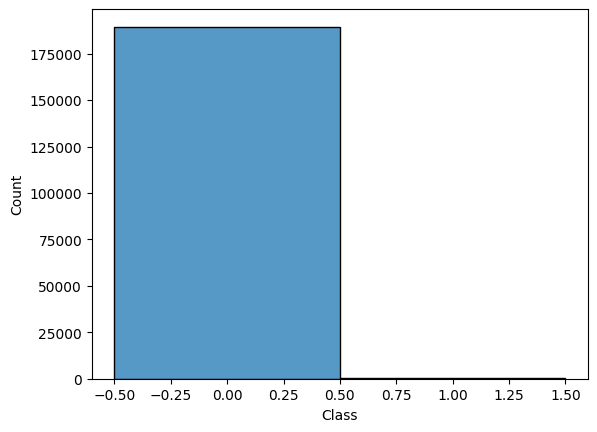

time: 266 ms (started: 2022-10-03 19:29:58 +03:00)


In [ ]:
sns.histplot(y_train_oss, bins=3)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_oss, y_train_oss, X_test_std, y_test, baseline_model_best_param)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.89      0.56      0.69       142

    accuracy                           1.00     85118
   macro avg       0.94      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118
 

F1 on test: 0.689655172413793 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


0.689655172413793

time: 1.42 s (started: 2022-10-03 19:08:44 +03:00)


##### Правило «очищающего» соседа (neighborhood cleaning rule — NCR)

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NeighbourhoodCleaningRule.html

Идея здесь такая же, как и у одностороннего сэплинга. Все наблюдения классифицируются по правилу трех ближайших соседей (3-NN). Затем удаляются следующие примеры мажоритарного класса:
- которые правильно распознаны;
- являющиеся соседями миноритарных примеров, которые были неверно классифицированы.

Преимущество данного подхода в том, что увеличение области соседства позволяет лучше «очищать» данные от шумов.

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule 

ncr = NeighbourhoodCleaningRule(sampling_strategy='majority', n_jobs = -1)
X_traint_std_ncr, y_train_ncr = ncr.fit_resample(X_train_std, y_train)

# Вернём имена столбцов обучающим данным.
X_traint_std_ncr = pd.DataFrame(X_traint_std_ncr, columns=X_train_std.columns)

print("Complete!")

C:\Users\ArtyomBoyko\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)


Complete!
time: 23.1 s (started: 2022-10-03 19:27:23 +03:00)


Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_ncr))

Баланс классов в новом тренировочном наборе: Counter({0: 198070, 1: 331})
time: 16 ms (started: 2022-10-03 19:28:45 +03:00)


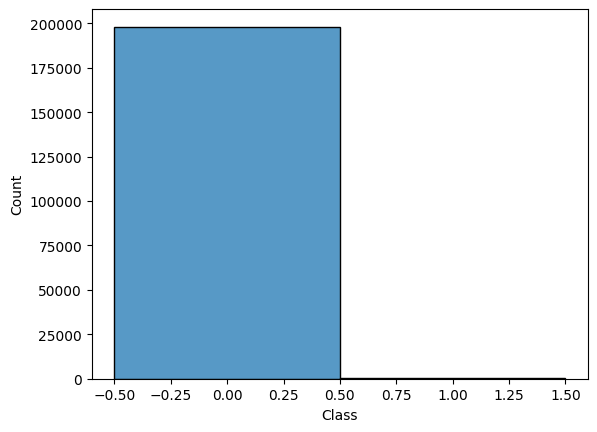

time: 250 ms (started: 2022-10-03 19:28:45 +03:00)


In [ ]:
sns.histplot(y_train_ncr, bins=3)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_ncr, y_train_ncr, X_test_std, y_test, baseline_model_best_param)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.63      0.74       142

    accuracy                           1.00     85118
   macro avg       0.94      0.82      0.87     85118
weighted avg       1.00      1.00      1.00     85118
 

F1 on test: 0.7377049180327869 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


0.7377049180327869

time: 1.69 s (started: 2022-10-03 19:28:48 +03:00)


#### Increasing the number of minority class examples (Увеличение числа примеров миноритарного класса)

##### Наивный случайный over-sampling (Naive random over-sampling)

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

Одним из способов борьбы c несбалансированностью данных является генерация новых образцов в классах, которые слабо представлены. Наиболее наивной стратегией является генерация новых образцов путем случайной выборки с заменой имеющихся образцов. `RandomOverSampler` предлагает такую схему:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Произведем over-sampling тренировочных данных
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')
X_traint_std_ros, y_train_ros = ros.fit_resample(X_train_std, y_train)

# Вернём имена столбцов обучающим данным.
X_traint_std_ros = pd.DataFrame(X_traint_std_ros, columns=X_train_std.columns)

print("Complete!")

Complete!
time: 141 ms (started: 2022-10-03 19:33:15 +03:00)


Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_ros))

Баланс классов в новом тренировочном наборе: Counter({0: 198277, 1: 198277})
time: 16 ms (started: 2022-10-03 19:33:19 +03:00)


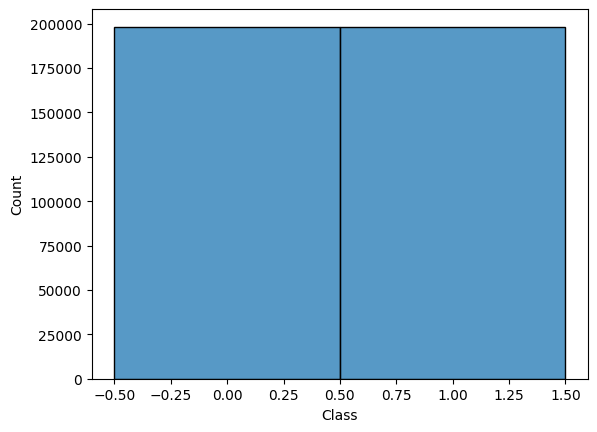

time: 359 ms (started: 2022-10-03 19:33:38 +03:00)


In [ ]:
sns.histplot(y_train_ros, bins=3)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_ros, y_train_ros, X_test_std, y_test, baseline_model_best_param)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.07      0.90      0.12       142

    accuracy                           0.98     85118
   macro avg       0.53      0.94      0.56     85118
weighted avg       1.00      0.98      0.99     85118
 

F1 on test: 0.12457420924574208 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


0.12457420924574208

time: 4.67 s (started: 2022-10-03 19:33:59 +03:00)


Судя по результатам, этот метод ухудщил наши результаты.

##### Алгоритм SMOTE

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

В основе алгоритма лежит идея генерации некоторого количества искусственных наблюдений, которые были бы «похожи» на наблюдения, имеющиеся в миноритарном классе, но при этом не дублировали их. 

Алгоритм SMOTE позволяет задавать количество наблюдений, которое необходимо искусственно сгенерировать. При этом степень сходства примеров aa и bb можно регулировать путем изменения числа ближайших соседей: чем оно меньше, тем выше будет степень сходства.

Недостатком данного подхода является то, что алгоритм просто увеличивает плотность наблюдений в областях векторного пространства, «населённых» преимущественно миноритарным классом. Т.е. работает эффективно, когда такие области имеются. Если же примеры миноритарного класса расположены равномерно, то в результате только увеличивается перемешивание классов, что затрудняет классификацию. 

In [ ]:
from imblearn.over_sampling import SMOTE


# Произведем over-sampling тренировочных данных
smote = SMOTE(random_state=42, sampling_strategy = 'minority', n_jobs = -1)
X_traint_std_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

# Вернём имена столбцов обучающим данным.
X_traint_std_smote = pd.DataFrame(X_traint_std_smote, columns=X_train_std.columns)

print("Complete!")

Complete!
time: 187 ms (started: 2022-10-03 19:36:50 +03:00)


Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_smote))

Баланс классов в новом тренировочном наборе: Counter({0: 198277, 1: 198277})
time: 15 ms (started: 2022-10-03 19:36:51 +03:00)


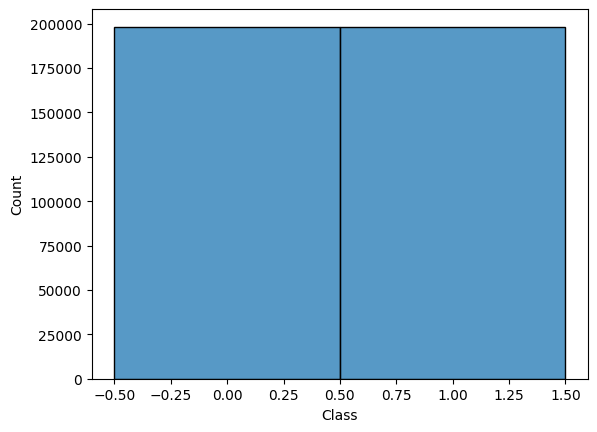

time: 359 ms (started: 2022-10-03 19:36:52 +03:00)


In [ ]:
sns.histplot(y_train_smote, bins=3)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_smote, y_train_smote, X_test_std, y_test, baseline_model_best_param)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.06      0.88      0.11       142

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118
 

F1 on test: 0.11368804001819009 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


0.11368804001819009

time: 5.41 s (started: 2022-10-03 19:36:53 +03:00)


##### Алгоритм ADASYN

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

Ещё одним недостатком алгоритма SMOTE является то, что он для каждого примера миноритарного класса создаёт одно и то же количество искусственных примеров. Это не вполне оптимально, поскольку не все примеры одинаково «просты» в обучении. Например, наблюдения, расположенные вблизи границ классов обычно «перемешаны» с наблюдениями соседнего класса, поэтому алгоритму обучения сложнее их распознать. Тогда при оверсэмплинге для таких примеров логично генерировать больше искусственных наблюдений, чтобы сделать границу класса более чёткой. На этом принципе и основана работа алгоритма ADASYN.

In [ ]:
from imblearn.over_sampling import ADASYN 

# Произведем over-sampling тренировочных данных
adasyn = ADASYN(random_state=42, sampling_strategy = 'minority', n_jobs = -1)
X_traint_std_adasyn, y_train_adasyn = smote.fit_resample(X_train_std, y_train)

# Вернём имена столбцов обучающим данным.
X_traint_std_adasyn = pd.DataFrame(X_traint_std_adasyn, columns=X_train_std.columns)

print("Complete!")

Complete!
time: 203 ms (started: 2022-10-03 19:39:28 +03:00)


Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_adasyn))

Баланс классов в новом тренировочном наборе: Counter({0: 198277, 1: 198277})
time: 16 ms (started: 2022-10-03 19:39:32 +03:00)


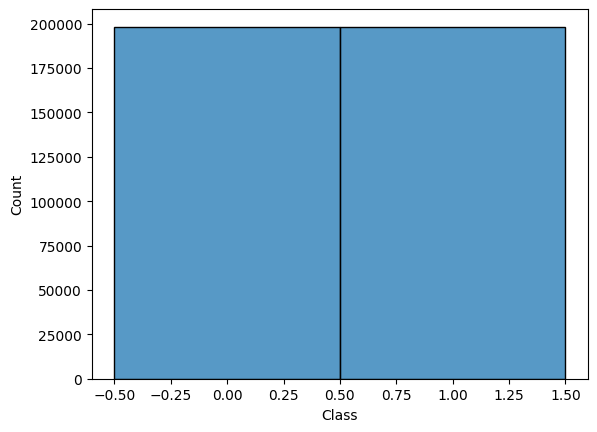

time: 359 ms (started: 2022-10-03 19:40:02 +03:00)


In [ ]:
sns.histplot(y_train_adasyn, bins=2)
plt.show()

In [ ]:
# Измерим результат преобразоавнных данных с помощью базовой модели
score_dataset(X_traint_std_adasyn, y_train_adasyn, X_test_std, y_test, baseline_model_best_param)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.06      0.88      0.11       142

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118
 

F1 on test: 0.11368804001819009 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


0.11368804001819009

time: 5.2 s (started: 2022-10-03 19:40:04 +03:00)


## Manual data balancing (Ручная балансировка данных)

In [ ]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

time: 0 ns (started: 2022-10-03 19:49:46 +03:00)


### Manual under-sampling (Ручной under-sampling)

Сократим количество примеров класса '0' в датасете случайным образом:

In [ ]:
# Выберем все экземпляры класса 1
class_one_df = df[df.Class == 1]

# Возьмём случайным образом 473 экземпляра класса 0
class_zero_df = df[df.Class == 0].sample(n=473, random_state=1)

# Соберем новый датасет
new_df = pd.concat([class_one_df, class_zero_df])

# Отсортируем значения времени по возрастанию
new_df.sort_values(by=['Time'], inplace = True)

new_df.shape

(946, 31)

time: 31 ms (started: 2022-10-03 19:49:48 +03:00)


#### Selecting data for modeling (Выбор данных для моделирования)

##### Selecting a prediction target (Выбор цели прогноза)

In [ ]:
y_manual = new_df['Class']
y_manual.shape

(946,)

time: 16 ms (started: 2022-10-03 19:49:49 +03:00)


##### Select model features (Выбор параметров модели)

In [ ]:
X_manual = new_df.drop('Class', axis=1)
X_manual.shape

(946, 30)

time: 0 ns (started: 2022-10-03 19:49:50 +03:00)


In [ ]:
X_manual.shape[0] != y_manual.shape[0]

False

time: 16 ms (started: 2022-10-03 19:49:50 +03:00)


#### Dividing the dataset into training and test samples (Разделение датасета на тренировочную и тестовую выборки)

In [ ]:
X_train_manual, X_test_manual, y_train_manual, y_test_manual = train_test_split(
    X_manual, y_manual, test_size=0.2, random_state=1, stratify=y_manual, shuffle=True)

Проверим насколько изменился баланс классов:

In [ ]:
print('Баланс классов в новом тренировочном наборе: %s' % Counter(y_train_manual))

Баланс классов в новом тренировочном наборе: Counter({1: 378, 0: 378})
time: 0 ns (started: 2022-10-03 19:52:37 +03:00)


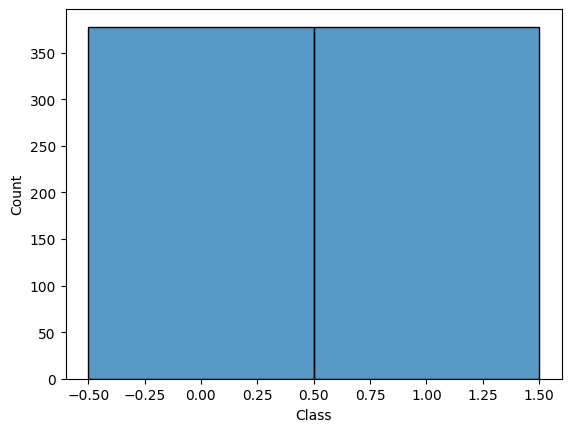

time: 156 ms (started: 2022-10-03 19:52:52 +03:00)


In [ ]:
sns.histplot(y_train_manual, bins=2)
plt.show()

#### Scaling numerical parameters (Масштабирование числовых параметров)

In [ ]:
# Создадим копию тренировочных и тестовых наборов
X_train_std_manual = X_train_manual
X_test_std_manual = X_test_manual

сol_for_norm = ['Time','Amount']

cur_scaler = StandardScaler()

# Стандартизируем тренировачный набор данных
X_train_std_manual[сol_for_norm] = cur_scaler.fit_transform(X_train_manual[сol_for_norm])

# Пирименим стандартизацию с теми же параметрами на тестовы набор.
X_test_std_manual[сol_for_norm] = cur_scaler.transform(X_test_manual[сol_for_norm])

# Получим имена столбцов
X_train_column_names = X_train_manual.columns
X_test_column_names = X_test_manual.columns

# Вернём имена столбцов нормализованным данным
X_train_std_manual = pd.DataFrame(X_train_std_manual, columns=X_train_column_names)
X_test_std_manual = pd.DataFrame(X_test_std_manual, columns=X_test_column_names)

# Проверим как прошла стандартизация тренировочного и тестового наборов
X_train_std_manual.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,9.398713e-18,-2.249067,1.703382,-3.182697,2.177727,-1.474464,-0.617604,-2.528215,0.382702,-1.248464,...,0.179064,0.242540,0.068474,-0.039688,-0.068886,0.013409,0.049267,0.087734,0.048046,1.879743e-17
std,1.000662e+00,5.259498,3.482841,5.957029,3.137654,4.077984,1.686883,5.669971,4.169203,2.329992,...,1.109949,2.176547,1.029741,1.187477,0.562287,0.673068,0.468015,0.951946,0.425640,1.000662e+00
min,-1.816416e+00,-29.876366,-9.230137,-30.558697,-3.588816,-21.665655,-5.773192,-43.557243,-41.044262,-13.434067,...,-7.593308,-22.797604,-8.887017,-19.254328,-2.775670,-4.781606,-1.715640,-7.263482,-1.869290,-4.420458e-01
25%,-8.642924e-01,-2.800824,-0.154604,-4.789958,-0.107834,-1.689783,-1.447669,-2.813199,-0.195724,-2.306398,...,-0.186119,-0.156608,-0.525094,-0.237232,-0.392492,-0.325216,-0.257146,-0.065014,-0.055718,-4.348933e-01
50%,-2.024500e-01,-0.812033,0.975391,-1.152790,1.289498,-0.428592,-0.545853,-0.581491,0.175577,-0.662650,...,0.020153,0.153918,0.042493,-0.036949,0.001572,0.050542,0.007921,0.062887,0.035511,-3.697378e-01
75%,9.551020e-01,1.025283,2.622159,0.507359,4.019646,0.480873,0.189178,0.296152,0.780759,0.242812,...,0.413254,0.622855,0.620863,0.190901,0.333731,0.400456,0.323044,0.455390,0.219797,-4.026343e-02
max,1.758014e+00,2.292366,22.057730,3.195413,12.114672,11.095089,6.474114,9.089581,19.587772,5.133431,...,11.059004,27.202839,8.361985,5.466230,1.091774,2.156042,2.745261,3.052358,3.731441,1.024177e+01


time: 47 ms (started: 2022-10-03 19:50:01 +03:00)


#### Optimization of hyperparameters (Оптимизация гиперпараметров)

In [ ]:
log_reg_grid = {'C': [ 0.01, 0.1, 1, 10, 100],
                'penalty': ['l2'],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_manual = LogisticRegression()

gs = GridSearchCV(log_reg_manual, log_reg_grid, cv=5, n_jobs=-1, scoring='f1', verbose=1)
gs.fit(X_train_std, y_train)

# Сохраним оптимальные параметры базовой модели для дальнейшего использования
man_und_best_param = gs.best_params_

val_model_man = LogisticRegression(**gs.best_params_)
val_model_man.fit(X_train_std_manual, y_train_manual)
prediction = val_model_man.predict(X_test_std_manual)
  
score = f1_score(y_test_manual, prediction)
print('Best GridSearch F1_score:', gs.best_score_, 'with params:', gs.best_params_)
print('F1 on test:', score, '\n')

print(classification_report(y_test_manual, prediction))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best GridSearch F1_score: 0.7125440336951396 with params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
F1 on test: 0.9473684210526315 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        95
           1       0.95      0.95      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

time: 1min 26s (started: 2022-10-03 19:55:07 +03:00)


#### Testing the model on the original dataset (Тестирование модели на иходном датасете)

Протестируем модель на оригинальном датасете после нормализации:

In [ ]:
prediction = val_model_man.predict(X_test_std)
score = f1_score(y_test, prediction)

print('F1 on test:', score, '\n')
print(classification_report(y_test, prediction))

F1 on test: 0.094186902133922 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.90      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.94      0.54     85118
weighted avg       1.00      0.97      0.98     85118

time: 94 ms (started: 2022-10-02 21:50:35 +03:00)


# Применение конвейера для построения модели

Применим ковейер для построени модели:

In [ ]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


# Шаг 1 - Загрузим и предобработаем данные

col_dtypes = {
    'Time' : 'int32',
    'V1' : 'float32',
    'V2' : 'float32',
    'V3' : 'float32',
    'V4' : 'float32',
    'V5' : 'float32',
    'V6' : 'float32',
    'V7' : 'float32',
    'V8' : 'float32',
    'V9' : 'float32',
    'V10' : 'float32',
    'V11' : 'float32',
    'V12' : 'float32',
    'V13' : 'float32',
    'V14' : 'float32',
    'V15' : 'float32',
    'V16' : 'float32',
    'V17' : 'float32',
    'V18' : 'float32',
    'V19' : 'float32',
    'V20' : 'float32',
    'V21' : 'float32',
    'V22' : 'float32',
    'V23' : 'float32',
    'V24' : 'float32',
    'V25' : 'float32',
    'V26' : 'float32',
    'V27' : 'float32',
    'V28' : 'float32',
    'Amount' : 'float32',
    'Class' : 'int16'
}

category_columns = ['Class']

df_pipe = pd.read_csv("creditcard.csv", sep=",", decimal='.', dtype = col_dtypes)

df_pipe[category_columns] = df_pipe[category_columns].astype('category')

df_pipe = df_pipe.drop_duplicates()

# ----------------------------------------------------------------------

# Ручной under-sampling
# Выберем все экземпляры класса 1
class_one_df = df_pipe[df.Class == 1]

# Возьмём случайным образом 473 экземпляра класса 0
class_zero_df = df_pipe[df.Class == 0].sample(n=473, random_state=1)

# Соберем новый датасет
new_df = pd.concat([class_one_df, class_zero_df])

# Отсортируем значения времени по возрастанию
new_df.sort_values(by=['Time'], inplace = True)

# ----------------------------------------------------------------------

y_pipe = new_df['Class']
X_pipe = new_df.drop('Class', axis=1)

print(X_pipe.shape, y_pipe.shape)

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    X_pipe, y_pipe, test_size=0.3, random_state=1, stratify=y_pipe)


# Препроцессор для числовых столбцов
numeric_preprocessor = Pipeline( steps=[("scaler", StandardScaler())])

# Препроцессор преобразования датасета
preprocessor = ColumnTransformer(
    [("numerical", numeric_preprocessor, ["Time", "Amount"])])

# Конвейер 
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("log_reg", LogisticRegression())])

# Диапазоны гиперпараметров модели для перебора
log_reg_grid = {'log_reg__C': [ 0.01, 0.1, 1, 10, 100],
                'log_reg__penalty': ['l2'],
                'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Оптимизация гиперпараметров
grid_search = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1', cv=5)

grid_search.fit(X_train_pipe, y_train_pipe)

grid_search.best_params_


grid_search.score(X_test, y_test)

(946, 30) (946,)
time: 5.04 s (started: 2022-10-03 19:40:17 +00:00)


# Применение конвейера для построения модели и балансировки классов 

> ЗАПУСКАТЬ ЯЧЕЙКИ СТРОГО ПОСЛЕДОВАТЕЛЬНО! ИНАЧЕ НЕ СФОРМИРУЕТСЯ ДАТАФРЕЙМ С РЕЗУЛЬТАТАМИ!

## Предварительная подготовка данных

In [ ]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


# Шаг 1 - Загрузим и предобработаем данные

col_dtypes = {
    'Time' : 'int32',
    'V1' : 'float32',
    'V2' : 'float32',
    'V3' : 'float32',
    'V4' : 'float32',
    'V5' : 'float32',
    'V6' : 'float32',
    'V7' : 'float32',
    'V8' : 'float32',
    'V9' : 'float32',
    'V10' : 'float32',
    'V11' : 'float32',
    'V12' : 'float32',
    'V13' : 'float32',
    'V14' : 'float32',
    'V15' : 'float32',
    'V16' : 'float32',
    'V17' : 'float32',
    'V18' : 'float32',
    'V19' : 'float32',
    'V20' : 'float32',
    'V21' : 'float32',
    'V22' : 'float32',
    'V23' : 'float32',
    'V24' : 'float32',
    'V25' : 'float32',
    'V26' : 'float32',
    'V27' : 'float32',
    'V28' : 'float32',
    'Amount' : 'float32',
    'Class' : 'int16'
}

category_columns = ['Class']

df_pipe = pd.read_csv("creditcard.csv", sep=",", decimal='.', dtype = col_dtypes)

df_pipe[category_columns] = df_pipe[category_columns].astype('category')

df_pipe = df_pipe.drop_duplicates()

y_pipe = df_pipe['Class']
X_pipe = df_pipe.drop('Class', axis=1)

print(X_pipe.shape, y_pipe.shape)

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    X_pipe, y_pipe, test_size=0.3, random_state=1, stratify=y_pipe)

print("Data preparation complete!")

(283726, 30) (283726,)
Data preparation complete!
time: 4.88 s (started: 2022-10-04 14:59:49 +00:00)


Мы будем использовать словарь и список для постоянного хранения результатов наших экспериментов. Далее мы будем отображать результаты в виде дата фрейма Pandas.

Мы будем сохранять следующую информацию:
- название модели
- наилучшие гиперпараметры
- тип используемого алгоритма балансировки классов (under-sampling, over-sampling)
- название ресемплера
- оценку f1 macro


In [ ]:
row_index = []
scores = {"Model best param": [], "Balance algorithm type": [], "Resampler": [], "f1 macro": []}

time: 1.11 ms (started: 2022-10-04 15:00:06 +00:00)


In [ ]:
import gc
del df_scores
gc.collect()

2181

time: 103 ms (started: 2022-10-04 15:00:39 +00:00)


## Логистическая регрессия (базовая модель)

In [ ]:
from sklearn.metrics import f1_score

# Добавим соответствующий индекс 
row_index += ["Logistic regression"]


# Препроцессор для числовых столбцов
numeric_preprocessor = Pipeline( steps=[("scaler", StandardScaler())])

# Препроцессор преобразования датасета
preprocessor = ColumnTransformer(
    [("numerical", numeric_preprocessor, ["Time", "Amount"])])

# Конвейер обьединяющий препроцессор данных и модель
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("log_reg", LogisticRegression(max_iter=1000, n_jobs=-1))])

# Диапазоны гиперпараметров модели для перебора
log_reg_grid = {'log_reg__C': [ 0.01, 0.1, 1, 10, 100],
                'log_reg__penalty': ['l2'],
                'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("None")
scores["Resampler"].append("None")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

,Model best param,Balance algorithm type,Resampler,f1 macro
Logistic regression,"{'log_reg__C': 0.01, 'log_reg__penalty': 'l2',...",None,None,0.499583


time: 7min 15s (started: 2022-10-04 15:01:26 +00:00)


## Логистическая регрессия c балансировкой веса классов

Большинство моделей в scikit-learn имеют параметр `class_weight`. Этот параметр влияет на вычисление потерь в линейной модели или критерия в древовидной модели, чтобы по-разному штрафовать ложную классификацию из класса меньшинства и большинства. Мы можем установить class_weight="balanced", чтобы вес был обратно пропорционален частоте классов.

In [ ]:
# Задаим для модели конвейера параметр class_weight
pipe.set_params(log_reg__class_weight="balanced")

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("None")
scores["Resampler"].append("None")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

,Model best param,Balance algorithm type,Resampler,f1 macro
Logistic regression,"{'log_reg__C': 0.01, 'log_reg__penalty': 'l2',...",None,None,0.499583
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",None,None,0.349745


time: 1min 53s (started: 2022-10-04 15:09:45 +00:00)


## Конвейеры с методами under-sampling

### Логистическая регрессия + RandomUnderSampler

In [ ]:
from imblearn.pipeline import Pipeline as Pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

# Переопределяем участок конвеера, добавляем семплинг данных
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", RandomUnderSampler(random_state=15)), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("RandomUnderSampler")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

### Логистическая регрессия + Поиск связей Томека (Tomek Links)

In [ ]:
from imblearn.under_sampling import TomekLinks

# Переопределяем участок конвеера, добавляем семплинг данных
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", TomekLinks(sampling_strategy='majority', n_jobs = -1)), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("TomekLinks")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

### Логистическая регрессия + Правило ближайшего соcредоточенного соседа (Condensed Nearest Neighbor Rule)

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

# Переопределяем участок конвеера, добавляем семплинг данных
# и учёт баланса классов при расчёте потерь
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", CondensedNearestNeighbour(random_state=42, sampling_strategy='majority', n_jobs=-1)), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("CondensedNearestNeighbour")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

### Логистическая регрессия + Односторонний сэмплинг (One-side sampling, one-sided selection — OSS)

In [ ]:
from imblearn.under_sampling import OneSidedSelection

# Переопределяем участок конвеера, добавляем семплинг данных
# и учёт баланса классов при расчёте потерь
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", OneSidedSelection(random_state=42, sampling_strategy='majority', n_jobs = -1)), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("OneSidedSelection")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

### Логистическая регрессия + Правило «очищающего» соседа (neighborhood cleaning rule — NCR)

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule 

# Переопределяем участок конвеера, добавляем семплинг данных
# и учёт баланса классов при расчёте потерь
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", NeighbourhoodCleaningRule(sampling_strategy='majority', n_jobs = -1)), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("NeighbourhoodCleaningRule")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

## Конвейеры с методами over-sampling

### Логистическая регрессия + Наивный случайный over-sampling (Naive random over-sampling)

In [ ]:
from imblearn.over_sampling import RandomOverSampler 

# Переопределяем участок конвеера, добавляем семплинг данных
# и учёт баланса классов при расчёте потерь
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", RandomOverSampler(random_state=0, sampling_strategy='minority')), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Over-sampling")
scores["Resampler"].append("RandomOverSampler")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

,Model best param,Balance algorithm type,Resampler,f1 macro
Logistic regression,"{'log_reg__C': 0.01, 'log_reg__penalty': 'l2',...",None,None,0.499583
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",None,None,0.349745
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,RandomUnderSampler,0.362120
Logistic regression (balanced class weights),"{'log_reg__C': 10, 'log_reg__penalty': 'l2', '...",Under-sampling,TomekLinks,0.349739
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Under-sampling,OneSidedSelection,0.349473
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,OneSidedSelection,0.349674
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Over-sampling,RandomOverSampler,0.349682


time: 3min 36s (started: 2022-10-04 16:56:43 +00:00)
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### Логистическая регрессия + Алгоритм SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Переопределяем участок конвеера, добавляем семплинг данных
# и учёт баланса классов при расчёте потерь
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", SMOTE(random_state=42, sampling_strategy = 'minority', n_jobs = -1)), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Over-sampling")
scores["Resampler"].append("SMOTE")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

,Model best param,Balance algorithm type,Resampler,f1 macro
Logistic regression,"{'log_reg__C': 0.01, 'log_reg__penalty': 'l2',...",None,None,0.499583
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",None,None,0.349745
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,RandomUnderSampler,0.362120
Logistic regression (balanced class weights),"{'log_reg__C': 10, 'log_reg__penalty': 'l2', '...",Under-sampling,TomekLinks,0.349739
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Under-sampling,OneSidedSelection,0.349473
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,OneSidedSelection,0.349674
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Over-sampling,RandomOverSampler,0.349682
Logistic regression (balanced class weights),"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",Over-sampling,SMOTE,0.346199


time: 3min 19s (started: 2022-10-04 17:00:32 +00:00)


### Логистическая регрессия + Алгоритм ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

# Переопределяем участок конвеера, добавляем семплинг данных
# и учёт баланса классов при расчёте потерь
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor),
           ("sampler", ADASYN(random_state=42, sampling_strategy = 'minority', n_jobs = -1)), 
           ("log_reg", LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1))
           ])

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=log_reg_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["Logistic regression (balanced class weights)"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Over-sampling")
scores["Resampler"].append("ADASYN")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

,Model best param,Balance algorithm type,Resampler,f1 macro
Logistic regression,"{'log_reg__C': 0.01, 'log_reg__penalty': 'l2',...",None,None,0.499583
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",None,None,0.349745
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,RandomUnderSampler,0.362120
Logistic regression (balanced class weights),"{'log_reg__C': 10, 'log_reg__penalty': 'l2', '...",Under-sampling,TomekLinks,0.349739
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Under-sampling,OneSidedSelection,0.349473
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,OneSidedSelection,0.349674
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Over-sampling,RandomOverSampler,0.349682
Logistic regression (balanced class weights),"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",Over-sampling,SMOTE,0.346199
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Over-sampling,ADASYN,0.347936


time: 3min 21s (started: 2022-10-04 17:05:11 +00:00)


## Use of specific balanced algorithms (Использование специфических сбалансированных алгоритмов)

### BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Переопределяем участок конвеера, добавляем семплинг данных
# и учёт баланса классов при расчёте потерь
pipe = Pipeline_with_sampler(
    steps=[("preprocessor", preprocessor), 
           ("bal_rfc", BalancedRandomForestClassifier(random_state=42, n_jobs=-1))
           ])
# Диапазоны гиперпараметров модели для перебора
bal_rand_for_cl_grid = {'bal_rfc__n_estimators': [i for i in range(1, 100) if i % 5 == 0],
                        'bal_rfc__criterion' : ['gini', 'entropy'],
                        'bal_rfc__max_depth' : [i for i in range(1, 5)]}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=bal_rand_for_cl_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_pipe, y_train_pipe)

# Заносим результаты в таблицу
row_index += ["BalancedRandomForestClassifier"]

scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("None")
scores["Resampler"].append("None")
scores["f1 macro"].append(gs.best_score_)

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

,Model best param,Balance algorithm type,Resampler,f1 macro
Logistic regression,"{'log_reg__C': 0.01, 'log_reg__penalty': 'l2',...",None,None,0.499583
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",None,None,0.349745
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,RandomUnderSampler,0.362120
Logistic regression (balanced class weights),"{'log_reg__C': 10, 'log_reg__penalty': 'l2', '...",Under-sampling,TomekLinks,0.349739
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Under-sampling,OneSidedSelection,0.349473
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,OneSidedSelection,0.349674
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Over-sampling,RandomOverSampler,0.349682
Logistic regression (balanced class weights),"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",Over-sampling,SMOTE,0.346199
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Over-sampling,ADASYN,0.347936
BalancedRandomForestClassifier,"{'bal_rfc__criterion': 'entropy', 'bal_rfc__ma...",None,None,0.456396


time: 29min 38s (started: 2022-10-04 17:29:05 +00:00)


Получим сводный отчет по классификации для данной модели:

In [ ]:
from sklearn.metrics import classification_report

clf = BalancedRandomForestClassifier( criterion = 'entropy', max_depth=1, n_estimators=35)

clf.fit(X_train_pipe, y_train_pipe)

prediction = clf.predict(X_test_pipe)

print(classification_report( y_test_pipe, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.34      0.80      0.47       142

    accuracy                           1.00     85118
   macro avg       0.67      0.90      0.74     85118
weighted avg       1.00      1.00      1.00     85118

time: 2.47 s (started: 2022-10-04 18:49:16 +00:00)


## Сохраним результаты для последующего анализа

Сохранение результатов в Excel:

In [ ]:
df_scores

,Model best param,Balance algorithm type,Resampler,f1 macro
Logistic regression,"{'log_reg__C': 0.01, 'log_reg__penalty': 'l2',...",None,None,0.499583
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",None,None,0.349745
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,RandomUnderSampler,0.362120
Logistic regression (balanced class weights),"{'log_reg__C': 10, 'log_reg__penalty': 'l2', '...",Under-sampling,TomekLinks,0.349739
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Under-sampling,OneSidedSelection,0.349473
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Under-sampling,OneSidedSelection,0.349674
Logistic regression (balanced class weights),"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'l...",Over-sampling,RandomOverSampler,0.349682
Logistic regression (balanced class weights),"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",Over-sampling,SMOTE,0.346199
Logistic regression (balanced class weights),"{'log_reg__C': 100, 'log_reg__penalty': 'l2', ...",Over-sampling,ADASYN,0.347936
BalancedRandomForestClassifier,"{'bal_rfc__criterion': 'entropy', 'bal_rfc__ma...",None,None,0.456396


time: 57.8 ms (started: 2022-10-04 18:23:27 +00:00)


# ВЫВОДЫ

1) После внесения изменений в датасет, в частности семплирования, необходимо заново оптимизировать гиперпараметры модели. Это легко заметить по столбцу `Model best param`. Именно ради этого в большинстве случаев использовалась одна и та же модель - `Logistic regression`.   
2) Методы Over-sampling и Under-sampling дали приблизительно одинаковые результаты.    
3) Модель `Logistic regression` c балансировкой веса классов стоит считать более честным вариантом, чем обычную модель `Logistic regression`. Её итоговая оценка `f1_score` значительно ниже чем у обычной.    
4) Наилучший результат показала "специализированная" модель `BalancedRandomForestClassifier` (результат `Logistic regression` без учета баланса классов не берем в расчёт).    
5) Лучше использовать комбинированную метрику (`f1_score`), а не несколько (`precision` и `recall`)    
6) Классификатор и метод семплинга следует подбирать индивидуально под конретный датасет.

# Ради интереса...

Это место зарезервированно для еще одного варианта после проверки работы.

# Дополнительные материалы:

https://loginom.ru/blog/imbalance-class

https://medium.com/nuances-of-programming/%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8-%D0%B4%D0%B6%D0%B5%D0%BD%D1%82%D0%BB%D1%8C%D0%BC%D0%B5%D0%BD%D1%81%D0%BA%D0%B8%D0%B9-%D0%BD%D0%B0%D0%B1%D0%BE%D1%80-4cad4bb1d4dhttps://imbalanced-learn.org/stable/introduction.html

https://medium.com/nuances-of-programming/%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8-%D0%B4%D0%B6%D0%B5%D0%BD%D1%82%D0%BB%D1%8C%D0%BC%D0%B5%D0%BD%D1%81%D0%BA%D0%B8%D0%B9-%D0%BD%D0%B0%D0%B1%D0%BE%D1%80-4cad4bb1d4d

https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook

http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2015/tutorials/r5_pca.html

https://www.geeksforgeeks.org/stratified-sampling-in-pandas/

Конвейер:

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html

https://scikit-learn.org/stable/modules/compose.html#pipeline

https://scikit-learn.org/stable/modules/compose.html#pipeline

Конвейеры с балансировкой классов:

https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html

Работа на 93% accuracy:

https://www.kaggle.com/code/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

Использование 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
